In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

# Data Preprocessing

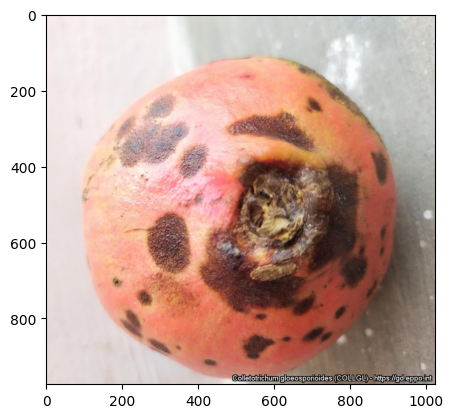

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the new training directory path
Train_DIR = r'/Users/shivangisingh/Desktop/pomegranate_disease_detection-main/images/train'
Categories = ['anthracnose', 'healthy', 'heartrot', 'sample']

# Iterate through each category and display one image
for j in Categories:
    path = os.path.join(Train_DIR, j)
    for img in os.listdir(path):
        old_image = cv2.imread(os.path.join(path, img))
        old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(old_image)
        plt.show()
        break
    break


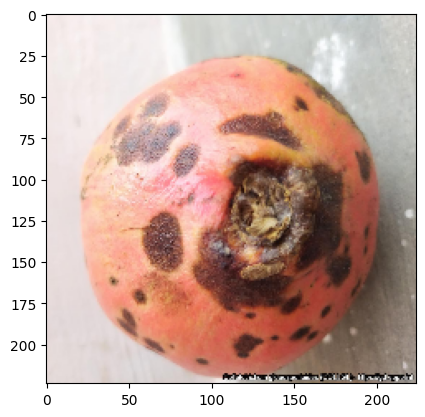

In [2]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Prepration

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size
IMG_SIZE = 224

# Create an ImageDataGenerator object with data augmentation and validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

# Define the new training directory path
train_dir = r'/Users/shivangisingh/Desktop/pomegranate_disease_detection-main/images/train'

# Create training data generator
train_datagen = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Create validation data generator
val_datagen = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 354 images belonging to 3 classes.
Found 87 images belonging to 3 classes.


In [6]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the new checkpoint path
checkpoint_path = '/Users/shivangisingh/Desktop/pomegranate_disease_detection-main/models/pomegranate2.h5'

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# Define EarlyStopping callback
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Combine callbacks into a list
callbacks = [checkpoint, earlystop]


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=/Users/shivangisingh/Desktop/pomegranate_disease_detection-main/models/pomegranate2.h5

In [8]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

C:\Users\gokha\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
22/22 [==============================] - 42s 2s/step - loss: 0.5143 - accuracy: 0.8432 - val_loss: 0.5161 - val_accuracy: 0.8750

Epoch 00001: val_loss improved from inf to 0.51614, saving model to C:\Users\gokha\ml_project\pomegranate_disease_detection\models\pomegranate2.h5
Epoch 2/30
22/22 [==============================] - 37s 2s/step - loss: 0.3403 - accuracy: 0.8728 - val_loss: 0.2552 - val_accuracy: 0.9000

Epoch 00002: val_loss improved from 0.51614 to 0.25524, saving model to C:\Users\gokha\ml_project\pomegranate_disease_detection\models\pomegranate2.h5
Epoch 3/30
22/22 [==============================] - 35s 2s/step - loss: 0.2727 - accuracy: 0.8817 - val_loss: 0.2986 - val_accuracy: 0.9000

Epoch 00003: val_loss did not improve from 0.25524
Epoch 4/30
22/22 [==============================] - 35s 2s/step - loss: 0.2703 - accuracy: 0.8994 - val_loss: 0.2334 - val_accuracy: 0.9000

Epoch 00004: val_loss improved from 0.25524 to 0.23340, saving model to C:\Users\gokha\

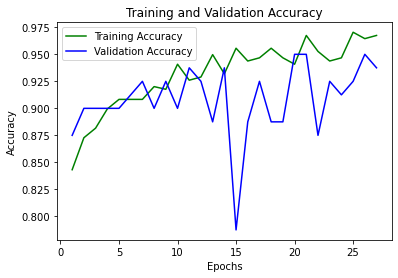

In [10]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,28)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

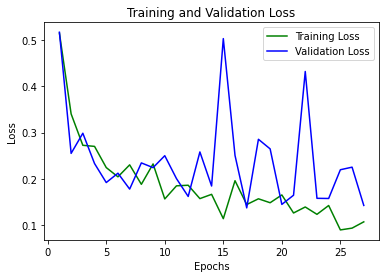

In [11]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,28)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Making the Prediction on a Single Image

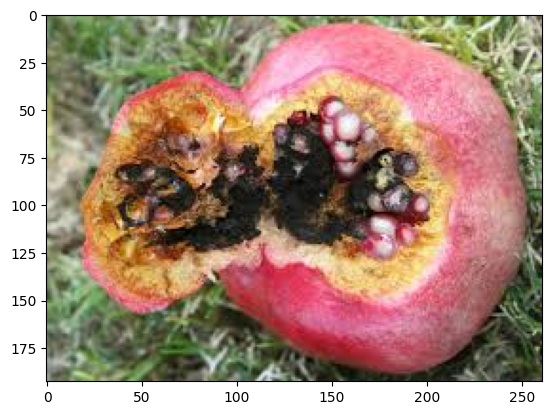

NameError: name 'model' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

# Define the new path for the test image
test_image_path = '/Users/shivangisingh/Desktop/pomegranate_disease_detection-main/images/test/Test_000.jpg'

# Load and display the test image
image_result = Image.open(test_image_path)
plt.imshow(image_result)
plt.show()

# Preprocess the test image
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

# Predict using the model
result = model.predict(test_image)
predicted_class = np.argmax(result)

# Define categories for interpretation
categories = ['anthracnose', 'healthy', 'heartrot', 'sample']

# Display the prediction result
plt.imshow(image_result)
plt.title(categories[predicted_class])
plt.show()

print("Predicted Class:", categories[predicted_class])


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the model
model = load_model('/Users/shivangisingh/Desktop/pomegranate_disease_detection-main/models/pomegranate_inceptionv3.h5')

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Adjust these paths according to your setup
test_dir = '/Users/shivangisingh/Desktop/pomegranate_disease_detection-main/images/test'
IMG_SIZE = 224  # Adjust based on your model's input size

# Generate batches of test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle=False to ensure correct ordering of predictions
)

# Evaluate the model on the test data
scores = model.evaluate(test_generator)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:32: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Found 0 images belonging to 0 classes.


ValueError: Must provide at least one structure